# Artficial Neural Network tutorial by YS Shin

source : https://github.com/shinys825/Practice, Book "신경망 첫걸음"

In [1]:
# import numpy to use nd.array
import numpy as np

# import expit to use sigmoid function
from scipy.special import expit

### Set Neural Network Class

In [13]:
# define neural network class
class NeuralNetwork(object):
    
    #initialize NN
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # make nodes
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
            ## there are 3 nodes for NN. input->hidden->output
        
        # set learning rate
        self.lr = learningrate
        
        # make weight matrix
        ## to use NN, we need to set weight randomly.
        ## the weight input layer to hidden layer.
        ### np.random.normal(center, standard deviation, ndarray)
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        ### the weight hidden layer layer to output layer.
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # make activation function
        self.activation_function = lambda x: expit(x)
        
    # train NN
    def train(self, inputs_list, targets_list):
        # Feed Forword
        ## transform entered list to 2D ndarray and transpose
        ### input values
        inputs = np.array(inputs_list, ndmin=2).T
        ### target values
        targets = np.array(targets_list, ndmin=2).T
        ## operate input signal to hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        ## operate output signal from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        ## operate input signal to output layer
        out_inputs = np.dot(self.who, hidden_outputs)
        ## operate output
        out_outputs = self.activation_function(out_inputs)
        
        
        # Back Propagation
        ## error = target - final outputs
        output_errors = targets - out_outputs
        ## hidden error could be calculated to recombine output layer errors by weight
        hidden_errors = np.dot(self.who.T, output_errors)
        # Update weight between output and hidden layers
        self.who += self.lr * np.dot((output_errors * out_outputs * (1.0-out_outputs)), np.transpose(hidden_outputs))
        # Update weight between hidden and input layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
            
        
    # query NN
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate inputs to hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate output from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate input to final output layer
        out_inputs = np.dot(self.who, hidden_outputs)
        # calculate output from final output layer
        out_outputs = self.activation_function(out_inputs)
        
        return out_outputs

## Test the NN Class

In [3]:
# the number of nodes

input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# set learning rate
learning_rate = 0.3

# create instance of NN
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
# send query
## initialize input
n.query([1.0, 0.5, -1.5])

array([[ 0.48163318],
       [ 0.55634079],
       [ 0.60569551]])

## AAN - Acknowledge handwritten(MNIST dataset)

- training dataset : 100

- test data : 10

In [5]:
# train dataset

p_train = open('./mnist_train_100.csv','r')
p_train_list = p_train.readlines()
p_train.close()

# 1st data in training dataset
print(len(p_train_list))

# first recode[0]
p_train_list[0]

100


'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
# import library for visulazation

# to use ndarray
import numpy as np
# to use imshow
import matplotlib.pylab as plt
%matplotlib inline

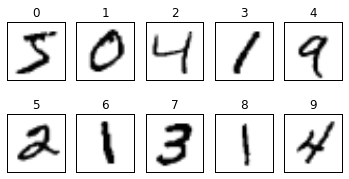

In [7]:
# display data
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks':[], 'yticks':[]})

# axes.flat: returns the axes as 1-dimensional(flat) array
for ax, i in zip(axes.flat, range(0, 10)):
    all_values = p_train_list[i].split(',')
    # string to float, all_values[0] = label, transform to 28*28 matrix
    image_array = np.asfarray(all_values[1:]).reshape(28,28)
    ax.imshow(image_array, cmap='Greys')
    ax.set_title(i)
fig.subplots_adjust(hspace=-0.3)
plt.show()

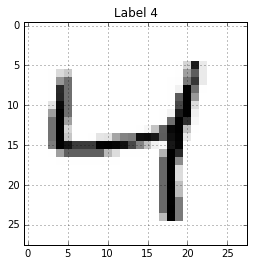

'4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,232,39,0,0,0,0,0,0,0,0,0,62,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,180,39,0,0,0,0,0,0,0,0,0,126,163,0,0,0,0,0,0,0,0,0,0,0,0,0,2,153,210,40,0,0,0,0,0,0,0,0,0,220,163,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,162,0,0,0,0,0,0,0,0,0,0,222,163,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,125,0,0,0,0,0,0,0,0,0,46,245,163,0,0,0,0,0,0,0,0,0,0,0,0,0,198,254,56,0,0,0,0,0,0,0,0,0,120,254,163,0,0,0,0,0,0,0,0,0,0,0,0,23,231,254,29,0,0,0,0,0,0,0,0,0,159,254,120,0,0,0,0,0,0,0,0,0,0,0,0,163,254,216,16,0,0,0,0,0,0,0,0,0,159,254,67,0,0,0,0,0,0,0,0,0,14,86,178,248,254,91,0,0,0,0,0,0,0,0,0,0,159,254,85,0,0,0,47,49,116,144,150,241,243,234,179,241,252,40,0,0,0,0,0,0,0,0,0,0,150,253,237,207,207,207,253,254,250,2

In [8]:
# display data
all_values = p_train_list[2].split(',')

# string to float, and all_value[0] = label, and transform to 28*28 matrix
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation='None')
plt.grid(True)
plt.title('Label {}'.format(all_values[0]))
plt.show()

p_train_list[2]

In [9]:
# scale input to range 0.01 to 1.00
## normalize RGB value
## +0.01 to prevent '0' value
## '0' input makes activation function's output '0'

scale_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scale_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

In [11]:
# make layer structure

# output node
out_nodes = 10
# 0 -> 0.01 to satisfy 0.01
## makes matrix included 0 dots using np.zeros
targets = np.zeros(out_nodes) + 0.01
targets[int(all_values[0])] = 0.99

print(targets)

[ 0.01  0.01  0.01  0.01  0.99  0.01  0.01  0.01  0.01  0.01]


## train the NN

In [17]:
# define layer structure
input_nodes = 784 # data = 28*28 matrix

# the number of hidden nodes: choose heuristically
## smaller than input nodes to extract core feature
## properly larger than output nodes
hidden_nodes = 100

# same as the number of labels
output_nodes = 10

# learning rate
learning_rate = 0.3

# make instance of ANN
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# train the NN (explore all records)
for record in p_train_list:
    # split the csv data by seperator ','
    all_values = record.split(',')
    # normalize input values
    inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    # make target value
    ## all is 0.01 except real value, 0.99
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0] = result
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [18]:
# open test dataset
p_test = open('./mnist_test_10.csv','r')
p_test_list = p_test.readlines()
p_test.close()

In [19]:
# test 1st data
test_values = p_test_list[0].split(',')
print('Target Label is', test_values[0])

Target Label is 7


In [21]:
# send query with normalized value
ans = n.query((np.asfarray(test_values[1:]) / 255.0 * 0.99) + 0.01)
print(ans)
print('Maximum value is {} and index is {}'.format(max(ans), np.argmax(ans)))
print('Predicted label is', np.argmax(ans))

[[ 0.00979648]
 [ 0.00535755]
 [ 0.01994593]
 [ 0.05002296]
 [ 0.04759018]
 [ 0.0185785 ]
 [ 0.0056295 ]
 [ 0.91056127]
 [ 0.05714313]
 [ 0.02040616]]
Maximum value is [ 0.91056127] and index is 7
Predicted label is 7
